In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2015-01-01'
end = '2025-03-31'

df = yf.download('AAPL',start=start,end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBIN.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS,SBIN.NS
Date,,,,,,


In [8]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100
2025-03-27,223.850006,224.990005,220.559998,221.389999,37094800
2025-03-28,217.899994,223.809998,217.679993,221.669998,39818600


In [9]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
1,2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2,2015-01-06,23.637505,23.897770,23.274910,23.699790,263188400
3,2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
4,2015-01-08,24.889910,24.947747,24.180294,24.298194,237458000


In [11]:
df.columns = df.columns.get_level_values(0)
df = df.drop(['index'],axis = 1)
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
1,2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2,2015-01-06,23.637505,23.897770,23.274910,23.699790,263188400
3,2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
4,2015-01-08,24.889910,24.947747,24.180294,24.298194,237458000


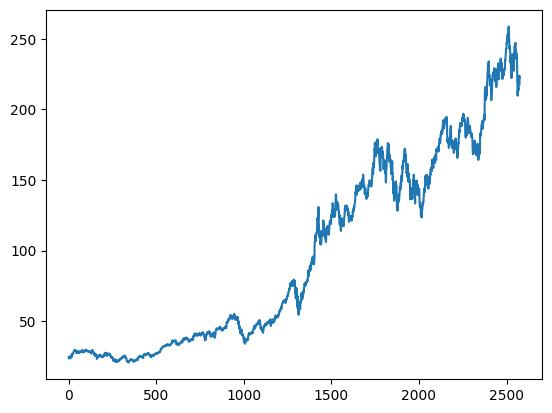

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2570    234.857403
2571    234.766028
2572    234.649760
2573    234.592313
2574    234.517174
Name: Close, Length: 2575, dtype: float64

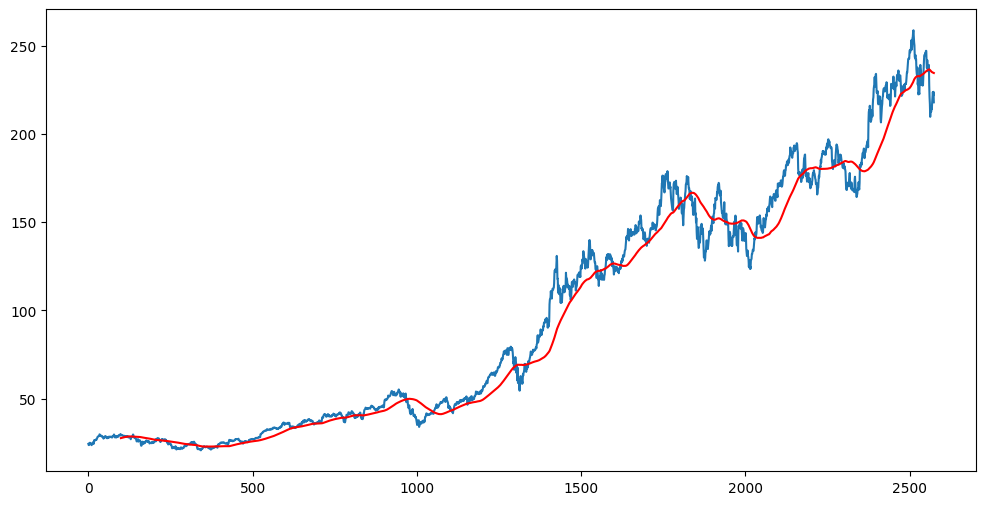

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2570    228.083552
2571    228.226233
2572    228.364740
2573    228.502838
2574    228.629972
Name: Close, Length: 2575, dtype: float64

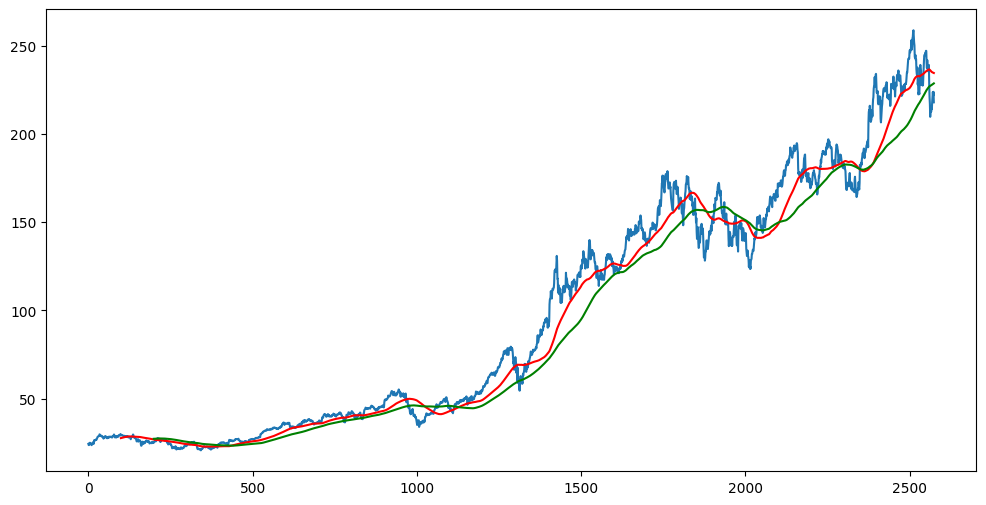

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(2575, 6)

In [18]:
# spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1802, 1)
(773, 1)


In [19]:
data_training.head()

,Close
0,24.320435
1,23.635292
2,23.637505
3,23.968966
4,24.889910


In [20]:
data_testing.head()

,Close
1802,160.597748
1803,163.904190
1804,163.579437
1805,160.568192
1806,156.759933


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02304535],
       [0.01871464],
       [0.01872862],
       ...,
       [0.88157905],
       [0.89470348],
       [0.89638275]])

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
# ML Model

In [24]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1 )))
model.add(Dropout(0.2))



model.add(LSTM(units = 60,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1 )))
model.add(Dropout(0.3))



model.add(LSTM(units = 80,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1 )))
model.add(Dropout(0.4))



model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - loss: 0.0620
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - loss: 0.0072
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - loss: 0.0063
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - loss: 0.0054
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - loss: 0.0044
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - loss: 0.0045
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - loss: 0.0045
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - loss: 0.0054
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - loss: 0.0042
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 0.0043
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - loss: 0.0032
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - loss: 0.0046
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - loss: 0.0032
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0038
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [33]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
1802,160.597748
1803,163.904190
1804,163.579437
1805,160.568192
1806,156.759933


In [35]:
past_100_days = data_training.tail(100)

In [38]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [39]:
final_df.head()

,Close
0,139.354599
1,140.620529
2,140.237808
3,140.149506
4,138.873734


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.16694184e-01],
       [1.26060871e-01],
       [1.23229097e-01],
       [1.22575742e-01],
       [1.13136234e-01],
       [1.08779513e-01],
       [1.29473856e-01],
       [1.37315932e-01],
       [1.49732855e-01],
       [1.65779983e-01],
       [1.69410528e-01],
       [1.71008071e-01],
       [1.65271704e-01],
       [1.64908729e-01],
       [1.69846324e-01],
       [1.66433565e-01],
       [1.93445374e-01],
       [1.73331453e-01],
       [1.67232223e-01],
       [1.74929223e-01],
       [1.85603185e-01],
       [1.81754742e-01],
       [1.85681538e-01],
       [1.79573163e-01],
       [1.82263698e-01],
       [1.61248152e-01],
       [1.60884387e-01],
       [1.76300626e-01],
       [1.76373560e-01],
       [1.83645263e-01],
       [2.01752263e-01],
       [2.33602767e-01],
       [2.53091106e-01],
       [2.56508946e-01],
       [2.59345009e-01],
       [2.63198985e-01],
       [2.25894591e-01],
       [2.50836819e-01],
       [2.87632257e-01],
       [2.83778169e-01],


In [41]:
input_data.shape

(873, 1)

In [42]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [43]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(773, 100, 1)
(773,)


In [44]:
# Making predictions

y_predicted = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


In [45]:
y_predicted.shape

(773, 1)

In [46]:
y_test

array([2.73873399e-01, 2.98337945e-01, 2.95935081e-01, 2.73654710e-01,
       2.45477202e-01, 2.31934547e-01, 2.72053102e-01, 2.39797849e-01,
       2.12202682e-01, 1.82277472e-01, 2.14823895e-01, 2.47588669e-01,
       2.55088205e-01, 2.79552638e-01, 2.89746096e-01, 3.14793322e-01,
       3.24913958e-01, 3.53018872e-01, 3.57751440e-01, 3.64158775e-01,
       3.88623209e-01, 3.79958313e-01, 3.56950297e-01, 3.54766235e-01,
       3.84837200e-01, 3.60227012e-01, 3.36709250e-01, 3.38966246e-01,
       3.24040108e-01, 2.92440130e-01, 3.06346888e-01, 3.26297104e-01,
       2.89090708e-01, 2.87489099e-01, 3.04453997e-01, 3.03216267e-01,
       2.97318678e-01, 2.63607120e-01, 2.71543469e-01, 2.27274575e-01,
       2.25600033e-01, 2.77077066e-01, 2.33463560e-01, 2.35720895e-01,
       2.46787526e-01, 2.94405955e-01, 2.27056225e-01, 2.32451971e-01,
       1.94388998e-01, 2.12253713e-01, 1.53846727e-01, 1.25117021e-01,
       1.58294447e-01, 1.46846325e-01, 1.73826184e-01, 1.12429477e-01,
      

In [47]:
y_predicted

array([[0.31929678],
       [0.31567377],
       [0.31223118],
       [0.30912107],
       [0.30638054],
       [0.30392897],
       [0.30165797],
       [0.29953012],
       [0.2974478 ],
       [0.295233  ],
       [0.29272285],
       [0.28975958],
       [0.2864581 ],
       [0.2830953 ],
       [0.28008828],
       [0.2777778 ],
       [0.2763736 ],
       [0.27600542],
       [0.27683175],
       [0.27905583],
       [0.28283203],
       [0.2884032 ],
       [0.29574847],
       [0.3043924 ],
       [0.31356323],
       [0.3227733 ],
       [0.331453  ],
       [0.3389383 ],
       [0.34479088],
       [0.34875405],
       [0.35059738],
       [0.35040843],
       [0.34863067],
       [0.34560263],
       [0.34166825],
       [0.33721906],
       [0.33259612],
       [0.32804793],
       [0.3236522 ],
       [0.31946075],
       [0.3154325 ],
       [0.31150365],
       [0.30770138],
       [0.3039871 ],
       [0.30032843],
       [0.29676723],
       [0.29357737],
       [0.290

In [49]:
scaler.scale_

array([0.00739905])

In [50]:
scale_factor = 1/0.00739905
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

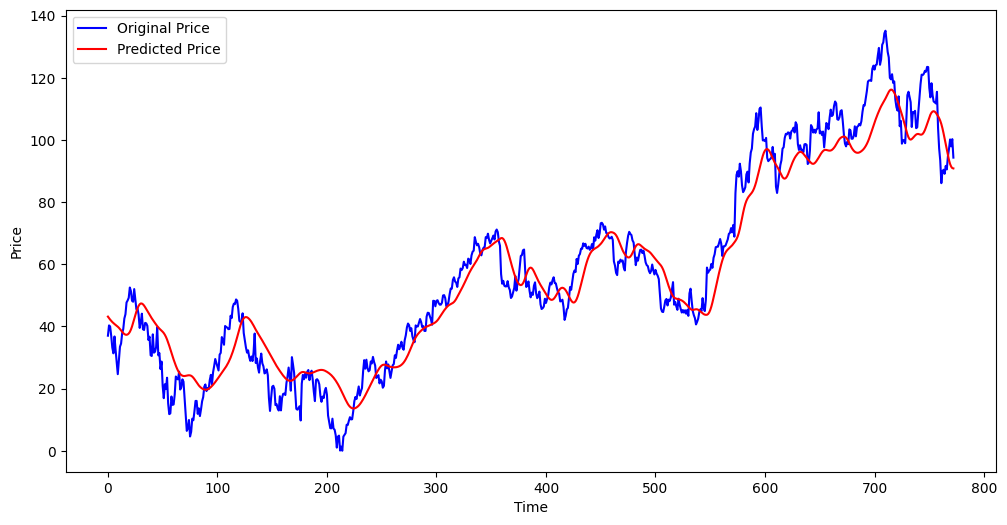

In [51]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = "Original Price")
plt.plot(y_predicted,'r',label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()